<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/Braki_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import numpy as np
import pandas as pd
sklearn.__version__

'0.22.2.post1'

In [17]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'male', 'female', 'female'],
    'price': [199.0, 89.0, np.nan, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, np.nan, 380, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data = data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,380.0,yes
5,M,green,female,79.0,NaN,no


Tworzenie kopii danych

In [18]:
df = df_raw.copy()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [6]:
print(df.isnull().sum())
print(df.isnull().sum().sum())
df.isnull().sum()/len(df)



size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64
5


size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [20]:
from sklearn.impute import SimpleImputer


Strategia zastępowania braków danych 'mean', 'median', 'most_frequent', 'constant'.

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(df[["weight"]]) # tutaj jeszcze nie uzupełniamy brakow danych 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [22]:
imputer.statistics_ # zwraca nam wartość, która zostanie uzupełniona

array([407.5])

In [23]:
df[['weight']] = imputer.transform(df[['weight']])

In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99)
imputer.fit(df[['price']])
imputer.statistics_
df[['price']] = imputer.transform(df[['price']])

In [25]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,NaN,green,male,99.0,407.5,no
4,L,red,female,129.0,380.0,yes
5,M,green,female,79.0,407.5,no


Metody fit i transform można połączyć w jedną metodę fit_transform

In [15]:
imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='L')
df[['size']] = imputer.fit_transform(df[['size']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,L,green,male,99.0,407.5,no
4,L,red,female,129.0,380.0,yes
5,M,green,female,79.0,407.5,no


In [26]:
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
df[['size']] = imputer.fit_transform(df[['size']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,L,green,male,99.0,407.5,no
4,L,red,female,129.0,380.0,yes
5,M,green,female,79.0,407.5,no


In [27]:
df = df_raw.copy()


Można stworzyć maskę logiczną

In [28]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [29]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,male,99.0,NaN,no
5,M,green,female,79.0,NaN,no


In [30]:
df[~pd.isnull(df['weight'])] # tylda zaprzecza !

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,red,female,129.0,380.0,yes


In [31]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [32]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,red,female,129.0,380.0,yes


Metoda fillna pozwala w miejsce braku danych podstawić zdefiniowaną wartość.

In [33]:
df.fillna('brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199,500,yes
1,L,green,male,89,450,no
2,M,blue,brak,brak,300,yes
3,brak,green,male,99,brak,no
4,L,red,female,129,380,yes
5,M,green,female,79,brak,no


In [34]:
df.fillna(0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0,0.0,300.0,yes
3,0,green,male,99.0,0.0,no
4,L,red,female,129.0,380.0,yes
5,M,green,female,79.0,0.0,no


In [35]:
df['size'].fillna('L', inplace = True) # zmiane zostaną dokonane na kolumnie, tzn odrazu w df

In [36]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,male,99.0,NaN,no
4,L,red,female,129.0,380.0,yes
5,M,green,female,79.0,NaN,no


Można też usunąć wszystkie braki danych

In [37]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,L,red,female,129.0,380.0,yes


In [38]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,L,red,female,129.0,380.0,yes


### Braki danych w szeregach czasowych

In [10]:

data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


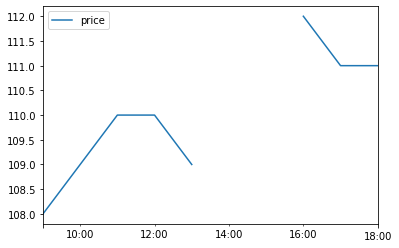

In [4]:
df.plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


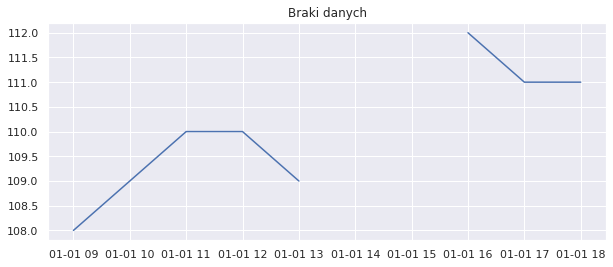

In [5]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize = (10,4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [6]:
import plotly.express as px
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width = 600, 
        height = 400, title = 'Szeregi czasowe - braki danych')

### Usunięcie braków danych 

In [7]:
df = df.dropna()
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width = 600, 
        height = 400, title = 'Szeregi czasowe - braki danych')

Wypełnienie braków danych stałą wartością 0

In [11]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price', width = 600, 
        height = 400, title = 'Szeregi czasowe - braki danych')

Uzupełnienie braków danych średnią

In [13]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price', width = 600, 
        height = 400, title = 'Szeregi czasowe - braki danych')

Interpolacja liniowa

In [16]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price', width = 600, 
        height = 400, title = 'Szeregi czasowe - braki danych')

Uzupełnianie braków danych metodą forward fill - wstawia te wartości które były zaobserwowane jako ostatnie



In [17]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(method = 'ffill')
px.line(df_plotly, 'index', 'price', width = 600, 
        height = 400, title = 'Szeregi czasowe - braki danych')

Wypełnianie braków danych metodą backward fill - patrzy na ostatnią zaobserwowaną wartość i nią uzupełnia braki danych

In [21]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych')